In [9]:
from line import Line
from mtf import *
from slanted_edge_sim import *
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

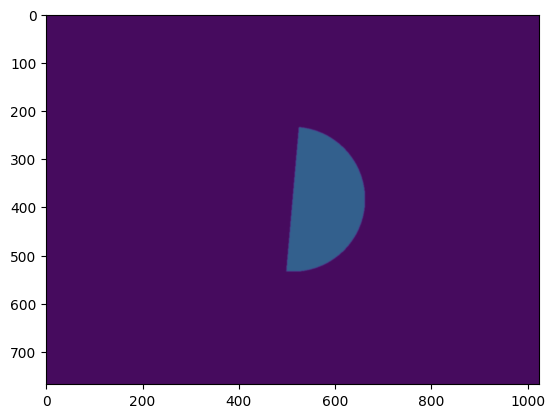

In [19]:
img = simulate_slanted_edge()
img = gaussian_filter(img, 1)
plt.imshow(img, vmin=0, vmax=0xffff)

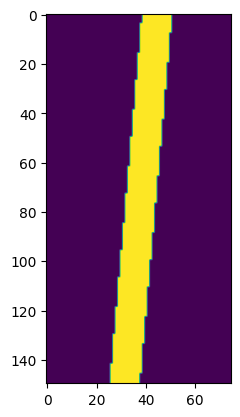

In [20]:
roi = (slice(300, 450), slice(475, 550))
edge_pix = get_edge_pixels(img[roi])
plt.imshow(edge_pix)

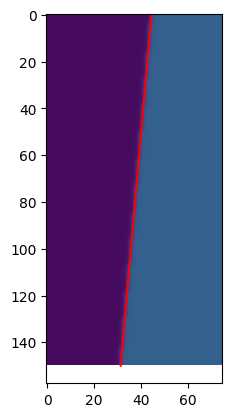

In [21]:
line = fit_edge_to_line(edge_pix)
plt.imshow(img[roi], vmin=0, vmax=0xffff)
pt0 = (line.x_from_y(0), 0)
pt1 = (line.x_from_y(img[roi].shape[0]), img[roi].shape[0])

plt.plot([pt0[0], pt1[0]], [pt0[1], pt1[1]], 'r')

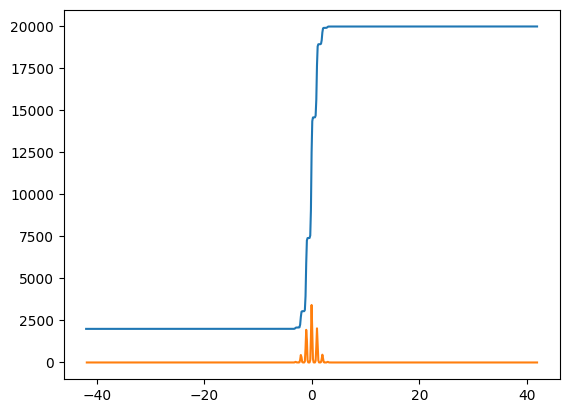

In [22]:
x, y, dy = line_spread_function(img[roi], line)
plt.plot(x, y)
plt.plot(x[1:], dy)

Ny / 4: 0.7351756087997523
Ny / 2: 0.29297393822966994


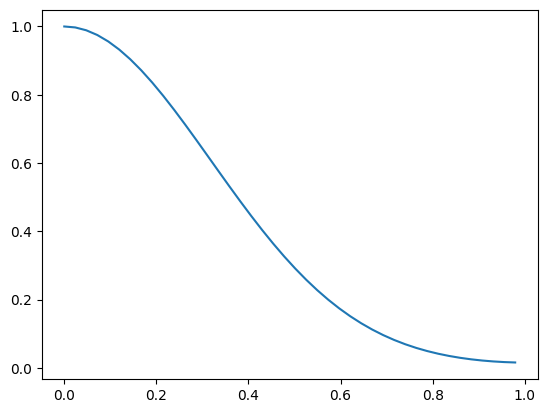

In [23]:
f, Y = mtf(dy)
idx = f < 1
plt.plot(f[idx], np.abs(Y)[idx])
print(f"Ny / 4: {np.interp(0.25, f, np.abs(Y))}")
print(f"Ny / 2: {np.interp(0.5, f, np.abs(Y))}")

0.8737754448072756


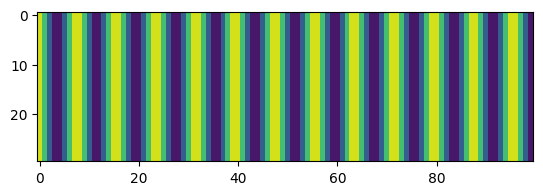

In [18]:
img = np.zeros((30, 100), dtype=np.uint16)
R, C = np.mgrid[:img.shape[0], :img.shape[1]]

T = 2 * 4
high = 0xffff * 1.0
low = 0xffff * 0.0
# low = 2000
# high = 20000

img[np.cos(2 * np.pi / T * C + .01) > 0] = high
img[np.cos(2 * np.pi / T * C + .01) <= 0] = low

img = gaussian_filter(img, 1)

max_val = img[:, 3 * T].mean()
min_val = img[:, 3 * T + T // 2].mean()

print((max_val - min_val) / (max_val + min_val))
plt.imshow(img, vmin=0, vmax=0xffff)